## Chapter3. 신경망

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## 실습1 : 활성화 함수

### 실습내용:
- 3가지 활성화 함수(계단함수, 시그모이드 함수, ReLU 함수를 구현하여 동작을 그래프로 확인하고 설명하라

In [ ]:
# 1. 계단함수
def step_function(x):
  return np.array(x>0, dtype=int)


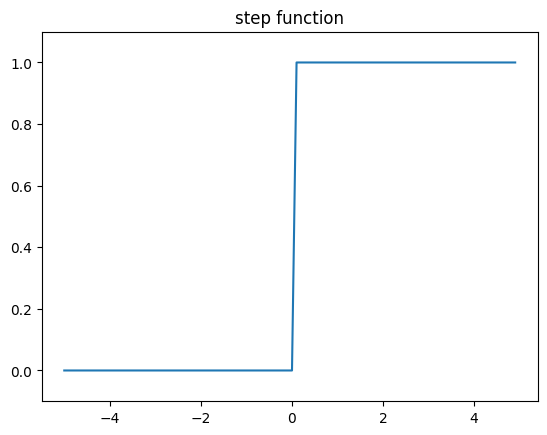

In [ ]:
x= np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.title("step function")
plt.show()


In [ ]:
# 2. 시그모이드 함수
def sigmoid(x):
  return 1 / (1+ np.exp(-x))

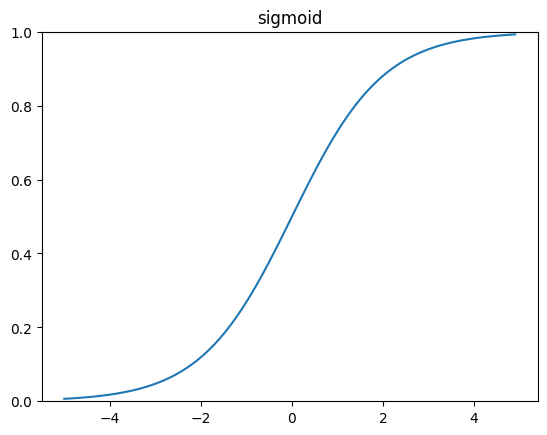

In [ ]:
x= np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.ylim(0.0, 1.0)
plt.title("sigmoid")
plt.show()

In [ ]:
# 3. ReLU 함수
def relu(x):
  return np.maximum(0,x)

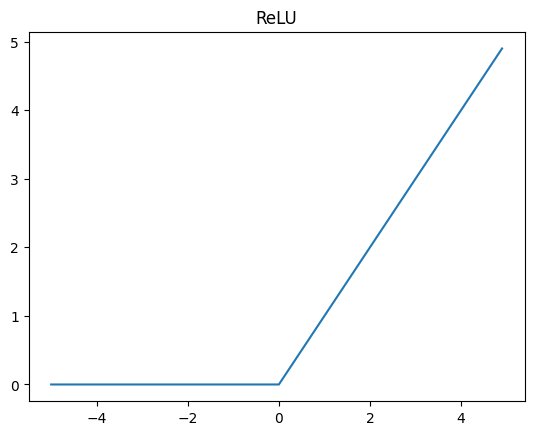

In [ ]:
x= np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x,y)
plt.title("ReLU")
plt.show()

 **결과 분석**

 1. **계단함수**<br>
    : 결과 값이 0보다 작으면 0,  0보다 크면 1을 출력하는 활성화 함수 <br>
    -> x값이 0 인 지점에서 미분불가능하다
 2. **시그모이드 함수**<Br>
    : step function 대신에 사용할 수 있는 활성화 함수로, 결과 값이 0,1 사이의 연속적인 값으로 나타나며, 모든 지점에서 미분가능하다.

 $h(a) = \frac{1}{ 1 + e^{-a}}$
 3. **ReLU 함수**<br>
    : 입력이 0을 넘으면 그 입력을 그대로 출력하고, 0 이하면 0을 출력하는 활성화 함수<br>
    -> 미분값을 이미 알고 있기 때문에 미분계산을 안해도 되고, 기울기 소실 문제가 발생하지 않음
$$h(x) = \begin{cases}
x \\\ (x>0)\\
0 \\\ (x\leq 0)
\end{cases} $$

## 실습2 : 3층 신경망 모델

### 실습내용:
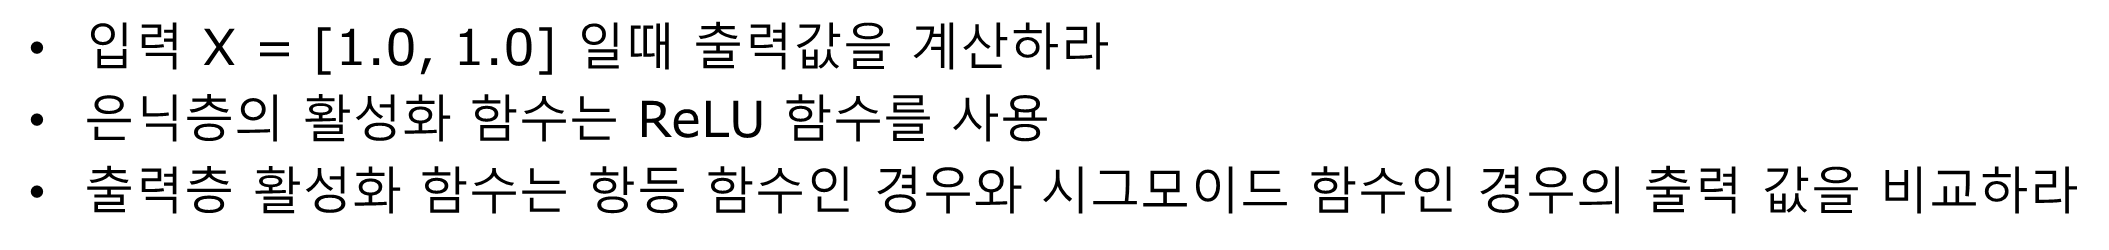

In [ ]:
W1 = np.array([[0.1,0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([[0.1, 0.2, 0.3]])
W2 = np.array([[0.1,0.2], [0.3, 0.4], [0.5, 0.6]])
B2 = np.array([0.1, 0.2])
W3 = np.array([0.1, 0.2])
B3 = np.array(0.2)

In [ ]:
#출력층 활성화 함수가 항등함수인 경우
X = np.array([1.0, 1.0])
Z1= np.dot(X,W1)+B1
A1 = relu(Z1) #은닉층 RELU
Z2 = np.dot(A1,W2)+ B2
A2 = relu(Z2) #은닉층 RELU
A3 = np.dot(A2,W3)+B3
Y = A3
print(Y)

[0.607]


In [ ]:
#출력층 활성화 함수가 시그모이드함수인 경
X = np.array([1.0, 1.0])
Z1= np.dot(X,W1)+B1
A1 = relu(Z1) #은닉층 RELU
Z2 = np.dot(A1,W2)+ B2
A2 = relu(Z2) #은닉층 RELU
A3 = np.dot(A2,W3)+B3
Y = sigmoid(A3)
print(Y)

[0.64725616]


 **결과 분석**

 1. 항등함수를 출력층 활성화함수로 사용한 경우
  결과값: 0.607 <BR>
  -> 항등함수는 은닉층에서 나온 결과값을 그대로 반환 (값의 변화가 없음)

 2. 시그모이드 함수를 출력층 활성화 함수로 사용한 경우
  결과값: 0.64 <BR>
  -> 시그모이드 함수는 출력값의 범위가 0~1 사이로 출력됨. <BR>
  -> 보통 이진분류 문제의 출력층에서 시그모이드함수(로지스틱함수)를 사용함 <BR>
  -> 이때, 출력값은 분류가 맞을 확률을 나타냄. <BR>

## 실습3 : 소프트맥스 함수

### 실습내용:
1. 소프트맥스 함수를 구현하고 입력 값이 [0.3, 2.9, 4.0], [1010,1000,990] 일때 출력 값과 결과를 설명하라.
2. 오버플로우를 고려한 소프트맥스 함수 구현하기

In [ ]:
# 소프트맥스 함수 구현
def softmax(a):
  exp_a = np.exp(a)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a
  return y

In [ ]:
# 입력값이 [0.3, 2.9, 4.0] 일때 출력값
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)

[0.01821127 0.24519181 0.73659691]


In [ ]:
# 입력값이 [1010, 1000, 990] 일 때 출력값
a = np.array([1010, 1000, 990])
y = softmax(a)
print(y)

[inf inf inf]
inf
[nan nan nan]


<ipython-input-22-055c7dd146ea>:3: RuntimeWarning: overflow encountered in exp
  exp_a = np.exp(a)
<ipython-input-22-055c7dd146ea>:7: RuntimeWarning: invalid value encountered in divide
  y = exp_a / sum_exp_a


In [ ]:
# 오버플로우를 고려한 소프트맥스 함수 구현
def softmax(a):
  c = np.max(a)
  exp_a = np.exp(a-c)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a
  return y

 **결과 분석**

  softmax 함수는 다중분류를 할때 사용되고, 분류할 클래스가 n일때, <BR>n개의 입력을 받아 각 클래스에 속할 확률를 구하는 함수이다.<br>
 따라서 소프트맥스 함수의 각 출력의 합은 1이되어야 하고, exp() 함수를 사용해 확률을 구한다.
 1. 입력값이 [0.3, 2.9, 4.0] 일때 softmax 함수 출력값 : [0.01821127 0.24519181 0.73659691]<br>

 2. 입력값이 [1010, 1000, 990] 일 때 softmax 함수 출력값 :[nan nan nan]<br>

    ->  입력값이 [1010, 1000, 990] 일 때 소프트맥스의 exp() 함수에 입력하게 되면 결과값이 무한대에 가까운 너무 큰 숫자로 나오게 되므로 오버플로우가 발생한다.
  
  
  따라서, softmax함수의 입력값중에서 최댓값을 빼주는 형식으로 소프트맥스 함수를 구현하면 오버플로우 문제를 해결할 수 있다.